<a href="https://colab.research.google.com/github/ernese/Deep-Learning-AUT2020/blob/master/(LBP)ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import metrics
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

print(tf.__version__)
print(keras.__version__)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2.2.0-rc2
2.3.0-tf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mnist=tf.keras.datasets.mnist

In [0]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


In [0]:
labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print(np.shape(X_train))
print(np.shape(X_test))

(60000, 28, 28)
(10000, 28, 28)


In [0]:
valid_images = X_train[:5000].astype('float32') / 255.0
valid_labels = y_train[:5000]

train_images = X_train[5000:].astype('float32') / 255.0
train_labels = y_train[5000:]

test_images = X_test.astype('float32') / 255.0
test_labels = y_test
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [0]:
print("Validation data after reshaping:{}".format(np.shape(valid_images)))
print("Train data after reshaping:{}".format(np.shape(X_train)))
print("Test data after reshaping :{}".format(np.shape(X_test)))

Validation data after reshaping:(5000, 28, 28)
Train data after reshaping:(60000, 28, 28)
Test data after reshaping :(10000, 28, 28)


In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [0]:
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

for img_index in range(len(X_train)):
	
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	labels_train.append(y_train[img_index])
	data_train.append(hist)
 
print(np.shape(data_train))
print(np.shape(labels_train))

(60000, 26)
(60000,)


In [0]:
data_test=[]
labels_test=[]

for im_index in range(len(X_test)):
  
  imag = (X_test[im_index])
  histo = desc.LBPfeatures(imag)

  labels_test.append(y_test[im_index])
  data_test.append(histo)
 
print(np.shape(data_test))
print(np.shape(labels_test))

(10000, 26)
(10000,)


In [0]:
data_train = np.asarray(data_train)
labels_train = np.asarray(labels_train)
data_test= np.asarray(data_test)
labels_test = np.asarray(labels_test)

Epoch 1/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.7699 - accuracy: 0.3446 - val_loss: 1.5541 - val_accuracy: 0.4458
Epoch 2/15
1080/1080 [==============================] - 14s 13ms/step - loss: 1.5085 - accuracy: 0.4534 - val_loss: 1.4286 - val_accuracy: 0.4928
Epoch 3/15
1080/1080 [==============================] - 14s 13ms/step - loss: 1.4566 - accuracy: 0.4722 - val_loss: 1.3797 - val_accuracy: 0.5048
Epoch 4/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.4262 - accuracy: 0.4840 - val_loss: 1.3651 - val_accuracy: 0.5142
Epoch 5/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.4103 - accuracy: 0.4898 - val_loss: 1.3467 - val_accuracy: 0.5225
Epoch 6/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.3978 - accuracy: 0.4942 - val_loss: 1.3501 - val_accuracy: 0.5133
Epoch 7/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.3819 - accuracy: 0.5019 - val_loss: 1.3446 -

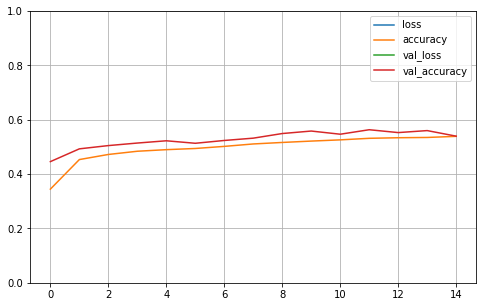

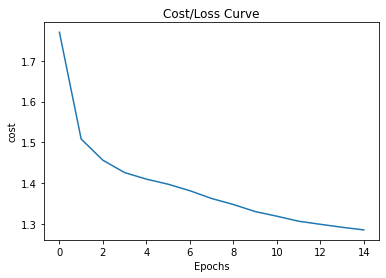

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=26),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Hist=model.fit(data_train, labels_train, epochs=15, batch_size=50, validation_split=0.1)

model.summary()

pd.DataFrame(Hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(Hist.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

##print('\n# Evaluate on test data')
##results = model.evaluate(data_test,labels_test)
##print('test loss, test acc:', results)

In [0]:
print('\n# Evaluate on test data')
results = model.evaluate(data_test,labels_test)
print('test loss, test acc:', results)


# Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 1.3113 - accuracy: 0.5284
test loss, test acc: [1.3113378286361694, 0.5284000039100647]


Epoch 1/15
1080/1080 [==============================] - 13s 12ms/step - loss: 2.2965 - accuracy: 0.1126 - val_loss: 2.2935 - val_accuracy: 0.1070
Epoch 2/15
1080/1080 [==============================] - 13s 12ms/step - loss: 2.2867 - accuracy: 0.1297 - val_loss: 2.2805 - val_accuracy: 0.1365
Epoch 3/15
1080/1080 [==============================] - 14s 13ms/step - loss: 2.2646 - accuracy: 0.1726 - val_loss: 2.2458 - val_accuracy: 0.1828
Epoch 4/15
1080/1080 [==============================] - 15s 14ms/step - loss: 2.1985 - accuracy: 0.2034 - val_loss: 2.1400 - val_accuracy: 0.2133
Epoch 5/15
1080/1080 [==============================] - 15s 14ms/step - loss: 2.0623 - accuracy: 0.2345 - val_loss: 1.9958 - val_accuracy: 0.2505
Epoch 6/15
1080/1080 [==============================] - 14s 13ms/step - loss: 1.9622 - accuracy: 0.2674 - val_loss: 1.9287 - val_accuracy: 0.2728
Epoch 7/15
1080/1080 [==============================] - 15s 14ms/step - loss: 1.9240 - accuracy: 0.2797 - val_loss: 1.9004 -

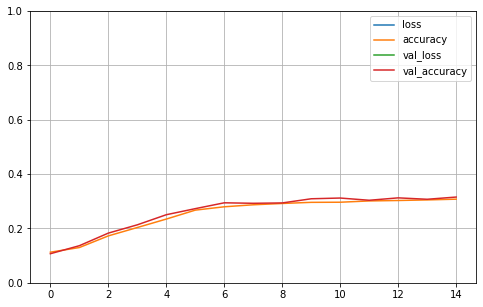

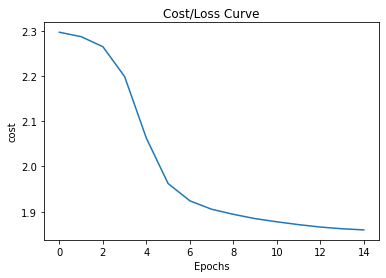

In [0]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=26),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Hist=model1.fit(data_train, labels_train, epochs=15, batch_size=50, validation_split=0.1)

model.summary()

pd.DataFrame(Hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(Hist.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

##print('\n# Evaluate on test data')
##results = model.evaluate(data_test,labels_test)
##print('test loss, test acc:', results)

In [0]:
print('\n# Evaluate on test data')
results = model1.evaluate(data_test,labels_test)
print('test loss, test acc:', results)


# Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 1.8399 - accuracy: 0.3180
test loss, test acc: [1.8398948907852173, 0.3179999887943268]
